### <p style="text-align: right;"> &#9989; Pranjal Tiwari</p>

#### <p style="text-align: right;"> &#9989; Cameron, Kyle</p>

---
# Homework #4: Exploring agent-based models with Mesa and modeling Spartans versus Wolverines (Individual and Group)

<img src=https://s-media-cache-ak0.pinimg.com/originals/d4/d6/2d/d4d62de622cc42b04c3ed1dbeb303670.jpg width=300px>

In this assignment, you'll be exploring how you can use the Python package "Mesa" to run agent-based models. Remember, one of the focuses of this class is learning how to use pre-existing software packages to solve problems. In this assignment you'll need to install Mesa, read the documention, and work through the Mesa tutorial individually. After that, you'll work with a group to use Mesa to run your own agent-based model.

One of the primary motivations for this assignment, beyond thinking about agent-based models, is to get you more practice with Object-Oriented Programming (OOP). Mesa is built upon a framework of classes and functions and you'll be finding ways to inherit the functionality of those classes to build your models.

**You are encouraged to read through the entire assignment before you start to make sure you understand what you're expected to do.**

### Goals for this assignment:

By the end of this assignment, you should be able to:

* Use Mesa to run and visualize an agent-based model

### Assignment instructions

**This assignment is due roughly three weeks from now at 11:59pm on Sunday, March 18th.** Each member of the group should upload a copy of this notebook with the Mesa tutorial completed and notes on the brainstorming session you had with your group. It should be uploaded into the "Homework Assignments" dropbox folder for Homework #4.  For the group part of the assignment, you'll create a **private** GitHub repository for your group and add your professor and your TA as collaborators on that repository. Further submission instructions can be found at the end of the notebook.

**Your group will be assigned by your instructor.**

### Grading

* Part 1: Installing and running Mesa (5 points)
* Part 2: Brainstorming plans for your agent-based model (5 points)
* Part 3: Running your Mesa model for Spartans versus Wolverines (15 points)

Total points: **25**

---
## Part 1: Installing and running Mesa

For this part of the assignment, you'll need to refer to the documentation for Mesa, which you can find [here](http://mesa.readthedocs.io/en/latest/index.html). Once you have things installed, if you want to explore some of the Mesa example problems, you can get some from their [GitHub repository](https://github.com/projectmesa/mesa/tree/master/examples).

### Step 1: Install Mesa

Use the documentation to figure out how you should install Mesa. Check that you've installed it correctly by running the following import command:

`from mesa import Agent, Model`

### Step 2: Work through the Mesa tutorial

To make sure you understand Mesa's functionality, you now need to work through the awesome, detailed Mesa tutorial. You can find the tutorial [here](http://mesa.readthedocs.io/en/latest/tutorials/intro_tutorial.html). This tutorial has you code up a simple model for looking at how wealth distributes itself.

You are expected to work through the material by taking the example code and running it inside this notebook to make sure you can get it all to work. For the next part of the assignment, you'll be working in a group to create a repository of shared scripts that run your agent-based model, so pay attention to the comments in the tutorial about how you would run Mesa using scripts -- you'll have to do that eventually!

In [10]:
# I pretty much copy pasted the code from the tutorial, but I understand how it works
# Also, ran into some wierd error and found a solution from here: https://github.com/projectmesa/mesa/issues/341
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
import mesa
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""
    def __init__(self, unique_id, model): 
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self): 
        """Not relevant to question"""
        return None

class MoneyModel(mesa.Model): 
    """A model with `N` agents of size width * height."""
    def __init__(self, N, width, height):
        self.initial_size = N
        self.grid = MultiGrid(width=width, height=height, torus=True)
        self.schedule = RandomActivation(self)
        # Create Agents
        for i in range(N):
            a = MoneyAgent(i, self)
            # Add to schedule
            self.schedule.add(a)
            # Add to grid
            x = random.randrange(self.grid.width)
            y = random.randrange(self.grid.height)
            self.grid.place_agent(a, (x,y))
        # Create DataCollector
        self.datacollector = DataCollector(
            model_reporters={"Gini": self.compute_gini},
            agent_reporters={"Wealth": lambda a: a.wealth},
        )

    def step(self): 
        """Advance the model by one step."""
        self.datacollector.collect(self)
        self.schedule.step()

    def wealth_list(self):
        return [x.wealth for x in self.schedule.agents]

    def compute_gini(self,_):
        """Return the Gini coefficient of 
        the current wealth distribution."""
        data = sorted(self.wealth_list())
        N = self.initial_size
        something = sum(x * (N - i) for i,x in enumerate(data))
        something /= (N * sum(data))
        return (1 + (1 / N) - (2 * something))

In [14]:
model = MoneyModel(50, 10, 10)
for i in range(20):
    model.step()

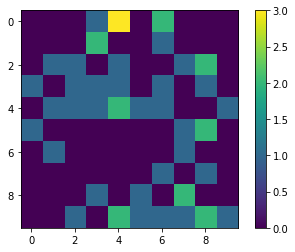

In [15]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

# If running from a text editor or IDE, remember you'll need the following:
plt.show()

### Step 3: Try out the advanced tutorial

If you can, work through the "Advanced Tutorial" which has you explore Mesa's built in visualization tools.

**If you're short on time, or you get stuck on this part of the activity**, talk to your group members about it. If for some reason you or your group members can't get it working, you won't be significantly penalized for not completing this portion, but you'll want to see if you can get it working so that you can visualize your group's model!

In [7]:
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer
from mesa.visualization.modules import ChartModule
from mesa.visualization.UserParam import UserSettableParameter

def agent_portrayal(agent):
    portrayal = {"Shape": "circle",
                 "Filled": "true",
                 "r": 0.5}

    if agent.wealth > 0:
        portrayal["Color"] = "red"
        portrayal["Layer"] = 0
    else:
        portrayal["Color"] = "grey"
        portrayal["Layer"] = 1
        portrayal["r"] = 0.2
    return portrayal

In [8]:
grid = CanvasGrid(agent_portrayal, 10, 10, 500, 500)
n_slider = UserSettableParameter('slider', "Number of Agents", 100, 2, 200, 1)
server = ModularServer(MoneyModel,
                       [grid],
                       "Money Model",
                       {"N": 100, "width": 10, "height": 10})

chart = ChartModule([{"Label": "Gini",
                      "Color": "Black"}],
                    data_collector_name='datacollector')

server = ModularServer(MoneyModel,
                       [grid, chart],
                       "Money Model",
                       {"N": n_slider, "width": 10, "height": 10})

In [9]:
server.port = 8521 # The default
server.launch()

Interface starting at http://127.0.0.1:8521


OSError: [WinError 10048] Only one usage of each socket address (protocol/network address/port) is normally permitted

___
## Part 2: Brainstorming ideas for your model

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/a/a7/Michigan_State_Athletics_logo.svg/888px-Michigan_State_Athletics_logo.svg.png" width=100px>
### VS.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Michigan_Wolverines_Logo.svg/1200px-Michigan_Wolverines_Logo.svg.png" width=100px>

The goal of this part of the assignment is getting you to think about how you would use Mesa to create an agent-based model. Specifically, you'll be trying to create a "predator-prey" model. From an ODE/Compartmental model perspective, this class of model would be refered to as a [Lotka-Volterra model](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations), but it turns out that you can model much of the same behavior using an agent-based model where you want to actually track how these populations move spatially. Here's an example of a [wolf-sheep agent-based model](http://netlogoweb.org/launch#http://netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Wolf%20Sheep%20Predation.nlogo) made using NetLogo (which is a coding language specifically built for running agent-based models).

To remind yourself of the agent-based models we've done the past, think about Conway's Game of Life and the ant foraging model. You might want to take a peek as the ant_class.py script from a while back to remind yourself a bit about OOP.

For the group part of your assignment, you're going to implement an agent-based model using the Mesa framework. For this model, you'll have the following agents in your model:

1. Spartans (predators)
2. Wolverines (prey)

In this scenario, you'll assume that Spartans hunt Wolverines as a food source. To prepare for writing your code, discuss your ideas with your group, either in person or Slack, and **answer the following questions**:

1. How will the Spartans and Wolverines move about in your 2D world? Think about what directions you'll allow them to move in.
1. Will you take into account birth and death rates of your agents? How will you handle that?
1. What happens when Spartans and Wolverines interact? Does the Spartan _always_ kill the Wolverine?
1. What happens when a Spartan runs into another Spartan?
1. What happens when a Wolverine run into another Wolverine?
1. Do Wolverines have a food source? If so, how would you model that?
1. Can you think of a third agent you might want to add to your system? If so, what would be it be?
1. How would you go about visualizing your simulation?

**Answers to the above questions**

<ol>
  <li>The model should use the Moore methodology of moving agents, where they can move to adjacent cells and diagonally</li>
  <li>Lets just assume Spartans and Wolverines undergo mitosis to reproduce, so there is a random chance that the entity will reproduce if enough food is present, for wolverines this is always the case, so they have a set change to reproduce. But since Spartans have Wolverines as food sources, a certain number of them must die to produce another spartan. Both spartans and wolverines should have a set death rate as a random percentage, but wolverines are subject to death by spartan, while the reverse is not true</li>
  <li>There is a percentage change that a spartan kills a wolverine but only if they are nearby</li>
  <li>If a spartan runs into another spartan, they will have a wonderful discussion about how much of a wimp the wolverines are and continue on their way, this will ofcourse happen on the same cell</li>
  <li>If a wolverine runs into another wolverine, they will wonder why they even bother existing if they're just food for the superior spartans and move on, all of which will be in the same cell</li>
  <li>Lets assume the wolverines are like sheep, where the grass is their food source, which is ever present in the environment and is never in short supply thoughout the year</li>
  <li>To make this more accurate to an ecosystem where multiple layer of predator and prey exist, we could add another agent that is a food source for wolverines, maybe the buckeyes. Or we could say that food sources are less present every certain ticks to simulate a winter season</li>
  <li>I was thinking we could use either the heat map or the visulization offered by meas in the advanced tutorial to show the grid along with a plot of the number of wolverines to spartans</li>
</ol>

---
## Part 3: Creating your agent-based model with Mesa

For this part of the assignment, you're going to work in groups of 3 to build a predator-prey model using the Mesa package. Mesa is designed to build and run agent-based models, but you have to set up the properties of your model and define how agents move and interact within your model. If necessary, review the nature of [Predator-Prey models](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations), [population dynamics](https://en.wikipedia.org/wiki/Population_dynamics), and [agent-based modeling](https://en.wikipedia.org/wiki/Agent-based_model).

For your model, the **predators will be Spartans** and the **prey will be Wolverines**. You should be able to use the documentation for Mesa to guide yourselve through setting up the model.

Since building such a model completely from scratch can be complicated and time consuming you're going to start off by using the pre-made Wolf-Sheep model provided in the Mesa "examples" folder on GitHub. You should be able to clone the whole Mesa repository, which you can find [here](https://github.com/projectmesa/mesa), but the part that you really need is the "Wolf-Sheep Predation Model", which is located [here](https://github.com/projectmesa/mesa/tree/master/examples/wolf_sheep).

The very first thing that should you do is run the Wolf-Sheep model to make sure that it works. Then, **as a group**, you will work to modify the model. You should figure out how to divide up the work so that each person in the group can help to contribute to a shared GitHub repository. **Each person in the group is responsible for making commits to your shared repository**. The very first thing you might want to do is to create the repository and make sure everyone has access to it so that you can start adding files and making changes.

Here are some ideas for modifications you can make to the wolf-sheep model to make it unique to your Spartans-Wolverines model, but don't limit yourself to just these:

* Modify the visualization so that the images that are displayed are appropriate for your model (i.e. it shouldn't still display wolves and sheep).
* Update the objects/variables to be appropriate for your model
* Add new rules and interactions to the model (e.g. what happens with a Spartan runs into a Spartan or a Wolverine runs into a Wolverine?)

Since meeting with your group in person can sometimes be difficult to coordinate, you should consider dividing up the work so that everyone can work on the code separately and push and pull changes to your repository. A good way to handle this is to assign specific tasks to each person, such tasks might be:

* Implement a new rule for the agent-based model
* Update the variables names to correspond to your new model
* Improve the visualization of your model

### Your completed model must do the following:

1. Include at least one new element that does not already exist in the wolf-sheep model. This could be a new agent, a new rule, modifications to existing rules or some combination of all of this.
2. Modify the visualization so that it is different than the default and makes sense for your model.
3. Run successfully so that the instructor can see how it works.

### In addition, your project must meet the following code requirements (read these carefully!):

1. Your code must be documented!
    - You should include adequate comments and docstrings when appropriate.
    - You should choose reasonable variables that make it easy to understand your code.
2. Your code should be written as a set of scripts, **it should not just run inside a jupyter notebook** (but you can provide a notebook with examples for presentation purposes, if you wish)
    - You should include a README.md file that explains how one should go about running your code and what modifications you made to the default model.
3. Your code should be contained in a **private** Git repository hosted on GitHub and your instructors (professor and TA) should be added as collaborators on your repository so that they can clone and run your code.
    - Each member of the group **must make at least one commit** to the code repository.
    - Your README file should contain information about who contributed what to the completed code.


---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/Hfd00adXg893c7TN2" 
	width="80%" 
	height="800px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

___
# Congrats, you're done!

Each person in the group should upload a copy of this notebook to the "Homework #4" dropbox on D2l. This notebook should contain the completed Mesa tutorial and your notes from your model brainstorming session. Your instructors should be added as collaborators on your **private** GitHub repository and there should be a README in the repository that explains how to run and visualize your model. If the instructor or TA can't get your model to run, they won't be able to give you a grade!